In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *

In [ ]:
x = np.array([20, 45, 80, 100, 160, 175, 190, 215, 223, 257,289,300,358,400,428,460,489])
y = np.array([10, 19, 27, 38, 47, 56, 63, 74, 87, 96, 110, 126,148,159,170,200,216])

In [ ]:
len(x)

17

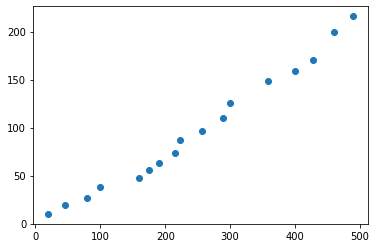

In [ ]:
plt.scatter(x,y)

In [ ]:
def descripcion_modelo(x, m, b):
  n = x.shape[0]
  y_est = np.zeros(n)

  for i in range(n):
    y_est[i] = m * x[i] + b

  return y_est

In [ ]:
m = 0.4
b = 0.1
descripcion_modelo(x, m, b)

array([  8.1,  18.1,  32.1,  40.1,  64.1,  70.1,  76.1,  86.1,  89.3,
       102.9, 115.7, 120.1, 143.3, 160.1, 171.3, 184.1, 195.7])

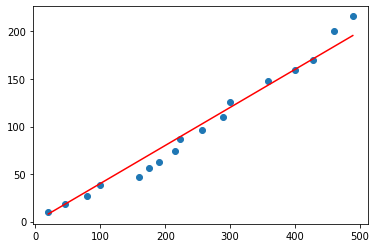

In [ ]:
plt.scatter(x,y)
plt.plot(x, descripcion_modelo(x, m, b), c = 'r')

## Función de costo

$$J(m,b) = \frac{1}{2n} \sum\limits_{i = 0}^{n-1} (f_{m,b}(x^{(i)}) - y^{(i)})^2 \tag{1}$$ 

In [ ]:
def funcion_costo(x,y,m,b):
  n = x.shape[0]
  suma_costos = 0
  y_est = np.zeros(n)

  for i in range(n):
    y_est[i] = m * x[i] + b
    costo = (y_est[i] - y[i])**2
    suma_costos = suma_costos + costo
 
  costo_total = (1/(2 * n))* suma_costos
  return costo_total

In [ ]:
funcion_costo(x,y,m,b)

48.65205882352939

## Gradiente descendente (GD)

Repite hasta alcanzar la convergencia {

$$ m = m -  \alpha \frac{\partial J(m,b)}{\partial m} $$

$$ b = b -  \alpha \frac{\partial J(m,b)}{\partial b} $$

}

El gradiente se define por:

$$
\begin{align}
\frac{\partial J(m,b)}{\partial m}  &= \frac{1}{n} \sum\limits_{i = 0}^{n-1} (f_{m,b}(x^{(i)}) - y^{(i)})x^{(i)} \\
  \frac{\partial J(m,b)}{\partial b}  &= \frac{1}{n} \sum\limits_{i = 0}^{n-1} (f_{m,b}(x^{(i)}) - y^{(i)})\\
\end{align}
$$

In [ ]:
def gradiente(x,y,m,b):
  n = x.shape[0]
  dj_dm = 0
  dj_db = 0
  y_est = np.zeros(n)

  for i in range(n):
    y_est[i] = m * x[i] + b
    dj_dm_i = (y_est[i]-y[i]) * x[i]
    dj_db_i = (y_est[i]-y[i])
    dj_dm += dj_dm_i
    dj_db += dj_db_i
  
  dj_dm = dj_dm/n
  dj_db = dj_db/n

  return dj_dm, dj_db

In [ ]:
def gradiente_descendente(x,y, m_inicial, b_inicial, alpha, iteraciones, funcion_costo, funcion_gradiente):
  m = m_inicial
  b = b_inicial

  costos = []

  for i in range(iteraciones):
    dj_dm, dj_db = gradiente(x,y,m,b)

    m = m - alpha * dj_dm
    b = b - alpha * dj_db

    costo_intermedio =  funcion_costo(x, y, m, b)
    costos.append(costo_intermedio)

  return m,b,costos

In [ ]:
m_inicial = 0.4
b_inicial = 0.1
alpha = 0.000001
iteraciones = 100


m, b , costos = gradiente_descendente(x,y, m_inicial, b_inicial, alpha, iteraciones, funcion_costo, gradiente)

In [ ]:
print(m,b)

0.40360165485018207 0.09973815630559339


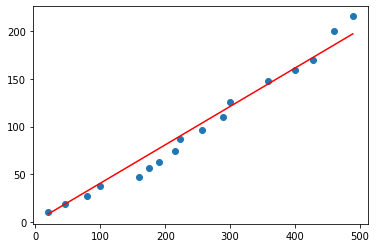

In [ ]:
plt.scatter(x,y)
plt.plot(x, descripcion_modelo(x, m, b), c = 'r')

## Gráfica de Costos vs Iteraciones

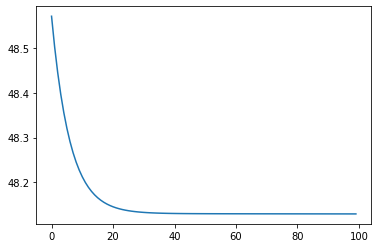

In [ ]:
plt.plot(np.arange(iteraciones), costos)